## ANÁLISIS DE CRIMINALIDAD EN EL MUNDO

El objetivo de este proyecto es realizar un análisis de la criminalidad en los diferentes países a nivel mundial y encontrar relaciones con variables socioeconómicas que puedan influir en la existencia de un mayor o menor número de crímenes en los mismos. Finalmente, se elaborará un modelo con el fin de predecir la probabilidad de que ocurra un crimen en el país que se quiera conocer.

### Obtención de datos

##### 1. Importación de librerías

In [116]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

##### 2. Lectura y exploración del data

In [117]:
data = pd.read_excel('./Data/FINAL DATA.xlsx')

In [118]:
data.head(3)

,CountryID,Country Name,Continent,Population (Millions),GDP per Capita (PPP),Tax Burden % of GDP,Gov't Expenditure % of GDP,Unemployment (%),Inflation (%),Public Debt (% of GDP),Country,Literacy (%),Birthrate,Deathrate,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Happiness Rank,Happiness score,Crime Index,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Afghanistan,Asia,38.928341,2390.024,7.47,NaN,11.73,5.607,7.785,Afghanistan,36.0,46.60,20.34,NaN,NaN,NaN,NaN,NaN,NaN,146.0,2404.0,36.00,20.37,2.72,12.09,14.92,12.41,23.04
1,2,Albania,Europe,2.837743,14218.106,18.30,30.514667,11.70,1.603,75.960,Albania,86.5,15.11,5.22,70.7,51.066122,82.0,82.6,70.0,70.0,90.0,5199.0,42.53,35.50,8.47,22.83,29.32,25.82,30.19
2,3,Algeria,Africa,43.851043,11112.187,37.20,37.827000,12.83,2.415,53.067,Algeria,70.0,17.14,4.61,50.0,51.470083,80.1,57.4,30.0,30.0,96.0,5122.0,52.03,26.87,4.59,16.43,28.82,14.48,24.63


In [119]:
data.shape

(231, 29)

In [120]:
data.columns

Index(['CountryID', 'Country Name', 'Continent', 'Population (Millions)',
       'GDP per Capita (PPP)', 'Tax Burden % of GDP',
       'Gov't Expenditure % of GDP ', 'Unemployment (%)', 'Inflation (%)',
       'Public Debt (% of GDP)', 'Country', 'Literacy (%)', 'Birthrate',
       'Deathrate', 'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom ', 'Financial Freedom',
       'Happiness Rank', 'Happiness score', 'Crime Index',
       'Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index',
       'Groceries Index', 'Restaurant Price Index',
       'Local Purchasing Power Index'],
      dtype='object')

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CountryID                       231 non-null    int64  
 1   Country Name                    231 non-null    object 
 2   Continent                       231 non-null    object 
 3   Population (Millions)           183 non-null    float64
 4   GDP per Capita (PPP)            180 non-null    float64
 5   Tax Burden % of GDP             177 non-null    float64
 6   Gov't Expenditure % of GDP      176 non-null    float64
 7   Unemployment (%)                179 non-null    float64
 8   Inflation (%)                   178 non-null    float64
 9   Public Debt (% of GDP)          180 non-null    float64
 10  Country                         226 non-null    object 
 11  Literacy (%)                    209 non-null    float64
 12  Birthrate                       223 

In [122]:
data.describe()

,CountryID,Population (Millions),GDP per Capita (PPP),Tax Burden % of GDP,Gov't Expenditure % of GDP,Unemployment (%),Inflation (%),Public Debt (% of GDP),Literacy (%),Birthrate,Deathrate,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Happiness Rank,Happiness score,Crime Index,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,231.000000,183.000000,180.000000,177.000000,176.000000,179.000000,178.000000,180.000000,209.000000,223.000000,222.000000,176.000000,176.000000,176.000000,176.00000,176.000000,176.000000,139.000000,139.000000,131.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,116.000000,42.162801,20230.145967,20.718023,32.611614,8.015922,21.670461,69.247156,275.800478,21.370135,9.818468,60.317614,55.720282,74.391477,69.53750,57.130682,48.863636,72.079137,5583.899281,55.397023,50.031397,19.189926,35.574191,46.494926,43.462868,46.597206
std,66.828138,150.074620,21170.903997,10.380789,13.495025,5.224458,181.307011,44.568887,1685.426732,11.421251,6.357413,16.504783,10.195382,13.556295,12.99737,20.781310,18.450355,42.641761,1101.008124,39.331144,21.028761,15.334454,17.651350,21.093144,25.132304,26.927951
min,1.000000,0.038137,759.861000,1.000000,10.074667,0.310000,-2.719000,2.854000,17.600000,2.000000,2.290000,5.000000,5.000000,0.000000,0.00000,0.000000,0.000000,1.000000,2404.000000,2.000000,19.920000,2.720000,12.090000,14.920000,12.410000,1.450000
25%,58.500000,2.558910,5008.405250,13.300000,22.932167,4.410000,0.546000,42.635000,74.800000,12.045000,6.007500,49.400000,51.198613,71.550000,62.50000,45.000000,37.500000,35.500000,4908.000000,29.455000,34.662500,9.402500,23.277500,31.105000,25.225000,27.150000
50%,116.000000,9.890400,12697.984000,18.700000,31.624667,6.610000,2.459500,60.641000,92.600000,18.320000,8.175000,61.150000,56.434460,77.950000,71.80000,60.000000,50.000000,70.000000,5711.000000,43.030000,44.225000,13.720000,30.440000,39.810000,34.430000,36.630000
75%,173.500000,31.164190,30196.984500,28.530000,39.400083,10.250000,4.930500,84.612000,98.000000,29.350000,11.170000,72.400000,61.705666,81.650000,79.20000,70.000000,60.000000,108.500000,6366.000000,64.000000,62.465000,24.940000,44.822500,56.585000,55.807500,65.922500
max,231.000000,1402.112000,118001.580000,46.340000,119.134333,28.740000,2355.147000,304.125000,17800.000000,50.730000,43.690000,91.400000,81.506187,87.100000,95.00000,95.000000,90.000000,146.000000,7821.000000,177.000000,146.040000,98.580000,123.800000,148.660000,159.170000,118.440000


Explicación de cada variable:
- **CountryID**: número identificativo de cada país.
- **Country Name**: nombre del país.
- **Continent**: continente al que pertenece el país en cuestión.
- **Population (Millions)**: población de cada país expresada en millones de habitantes.
- **GDP per capita (PPP)**: PIB per capita de cada país.
- **Tax Burden % GDP**: carga fiscal (impuestos soportados por la población de cada país) expresada como porcentaje del PIB.
- **Gov't Expenditure % of GDP**: gasto público de cada país expersado como porcentaje de PIB.
- **Unemployment (%)**: porcentaje de desempleo en cada país.
- **Inflation (%)**: inflación en cada país (expresada como porcentaje).
- **Public Debt (% of GDP)**: Deuda pública de cada país expresada como porcentaje de PIB.
- **Country**: nombre del país.
- **Literacy (%)**: porcentaje de alfabetización de cada país (porcentaje de la población de cada país que sabe leer y escribir, relacionado con la recepción de una educación básica).
- **Birthrate**: tasa de natalidad de cada país.
- **Deathrate**: tasa de mortalidad de cada país.
- **Business Freedom**: índice de libertad empresarial (capacidad de crear, gestionar y cerrar una empresa), lo cual representa la carga global de la regulación, así como la eficacia del gobierno en el proceso regulador.
- **Labor Freedom**: índice de libertad de trabajadores y empleadores de cada país para ejercer y concluir/anular la actividad profesional de su elección. (0-100).
- **Monetary Freedom**: índice de libertad económica de cada país (precios ajustados de manera natural en el mercado por oferta y demanda sin intervención del Estado; concepto ideológico). (0-100).
- **Trade Freedom**: índice de libertad de mercado (precios fijados en función de la interacción entre los oferentes y los demandantes, sin intervención del Estado o cualquier otro agente externo). (0-100).
- **Investment Freedom**: libertad de inversión de cada país (capacidad de particulares y empresas para dedicar sus recursos a determinadas actividades sin restricciones.).(0-100).
- **Financial Freedom**: libertad financiera de cada país (suficiente disposición de dinero en forma de efectivo e inversiones para hacer lo que se quiera). (0-100). 
- **Happiness Rank**: posición (ranking) de cada país según la puntuación del índice de felicidad.
- **Happiness score**: puntucación obtenida por cada país en el índice de felicidad.
- **Crime Index**: índice de criminalidad de cada país.
- **Cost of Living Index**: índice del coste de vida de cada país. 
- **Rent Index**: índice del coste de alquiler de cada país.
- **Cost of Living plus Rent Index**: índice del coste de vida con el coste de alquiler de cada país.
- **Groceries Index**: estimación de los precios de los comestibles de cada país en comparación con la ciudad de Nueva York.
- **Restaurant Price Index**: estimación de los precios de comidas y bebidas en restaurantes de cada país en comparación con la ciudad de Nueva York.
- **Local Purchasing Power Index**: poder adquisitivo relativo en la compra de bienes y servicios en un país determinado por el salario medio de ese país.

### Limpieza de datos

##### 3. Cambio de nombres de las columnas

La columna llamada *"Gov't Expenditure % of GDP"* tiene un nombre largo y la " ' " puede dar errores en pandas. Por lo tanto, se cambiará el nombre a "Government Expenditure (% GDP)".

In [123]:
data = data.rename(columns={"Gov't Expenditure % of GDP ":'Government Expenditure (% GDP)'}, inplace = False)

In [124]:
data.head(0)

,CountryID,Country Name,Continent,Population (Millions),GDP per Capita (PPP),Tax Burden % of GDP,Government Expenditure (% GDP),Unemployment (%),Inflation (%),Public Debt (% of GDP),Country,Literacy (%),Birthrate,Deathrate,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Happiness Rank,Happiness score,Crime Index,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index


##### 4. Eliminación de columnas prescindibles

Hay ciertas columnas que desde un principio se sabe que no serán esenciales o se encuentran duplicadas, por lo que se pueden eliminar:
- *CountryID*: con el nombre y continente al que pertenece cada país se tiene suficiente información, el ID no añade ni indica nada relevante.
- *Country*: esta columna está repetida, por lo que se eliminará y se mantendrá la primera (*"Country Name*).

In [125]:
data = data.drop(['CountryID', 'Country'], axis =1)

In [126]:
data.head(3)

,Country Name,Continent,Population (Millions),GDP per Capita (PPP),Tax Burden % of GDP,Government Expenditure (% GDP),Unemployment (%),Inflation (%),Public Debt (% of GDP),Literacy (%),Birthrate,Deathrate,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Happiness Rank,Happiness score,Crime Index,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Afghanistan,Asia,38.928341,2390.024,7.47,NaN,11.73,5.607,7.785,36.0,46.60,20.34,NaN,NaN,NaN,NaN,NaN,NaN,146.0,2404.0,36.00,20.37,2.72,12.09,14.92,12.41,23.04
1,Albania,Europe,2.837743,14218.106,18.30,30.514667,11.70,1.603,75.960,86.5,15.11,5.22,70.7,51.066122,82.0,82.6,70.0,70.0,90.0,5199.0,42.53,35.50,8.47,22.83,29.32,25.82,30.19
2,Algeria,Africa,43.851043,11112.187,37.20,37.827000,12.83,2.415,53.067,70.0,17.14,4.61,50.0,51.470083,80.1,57.4,30.0,30.0,96.0,5122.0,52.03,26.87,4.59,16.43,28.82,14.48,24.63


##### 5. Comprobación de valores únicos

In [127]:
for c in data.columns.tolist():
    print(c, len(data[c].unique()))

Country Name 231
Continent 5
Population (Millions) 184
GDP per Capita (PPP) 181
Tax Burden % of GDP 158
Government Expenditure (% GDP) 177
Unemployment (%) 162
Inflation (%) 178
Public Debt (% of GDP) 180
Literacy (%) 143
Birthrate 215
Deathrate 204
Business Freedom 151
Labor Freedom 177
Monetary Freedom 128
Trade Freedom 107
Investment Freedom  21
Financial Freedom 11
Happiness Rank 140
Happiness score 136
Crime Index 132
Cost of Living Index 134
Rent Index 131
Cost of Living Plus Rent Index 135
Groceries Index 137
Restaurant Price Index 136
Local Purchasing Power Index 136


##### 6. Comprobación y limpieza de NaNs

Ya a simple vista se puede observar que hay varios NaNs en todo el dataframe. Por lo tanto, se mostrará de manera resumida el número total de NaNs que hay en cada columna.

In [128]:
data.isna().sum()

Country Name                        0
Continent                           0
Population (Millions)              48
GDP per Capita (PPP)               51
Tax Burden % of GDP                54
Government Expenditure (% GDP)     55
Unemployment (%)                   52
Inflation (%)                      53
Public Debt (% of GDP)             51
Literacy (%)                       22
Birthrate                           8
Deathrate                           9
Business Freedom                   55
Labor Freedom                      55
Monetary Freedom                   55
Trade Freedom                      55
Investment Freedom                 55
Financial Freedom                  55
Happiness Rank                     92
Happiness score                    92
Crime Index                       100
Cost of Living Index               95
Rent Index                         95
Cost of Living Plus Rent Index     95
Groceries Index                    95
Restaurant Price Index             95
Local Purcha

Gracias a este pequeño resumen se puede observar que la columna "Crime Index" es la que presenta un mayor número de NaNs. Además, la mayoría del resto de variables también presentan un número significativo de NaNs, por lo que se procederá a crear una función genérica que permita sustituir todos aquellos NaNs por el valor de la media de la variable correspondiente.

In [129]:
data['Crime Index'] = data['Crime Index'].fillna(data['Crime Index'].median())

In [130]:
def replace_nans(data, replace_type='mean'):
    for col in data.select_dtypes(np.number).columns:
        if replace_type=='mean':
            data[col] = data[col].fillna(data[col].mean())
        else:
            data[col] = data[col].fillna(data[col].median())
    return data        

In [131]:
data = replace_nans(data)

In [132]:
data.isna().sum()

Country Name                      0
Continent                         0
Population (Millions)             0
GDP per Capita (PPP)              0
Tax Burden % of GDP               0
Government Expenditure (% GDP)    0
Unemployment (%)                  0
Inflation (%)                     0
Public Debt (% of GDP)            0
Literacy (%)                      0
Birthrate                         0
Deathrate                         0
Business Freedom                  0
Labor Freedom                     0
Monetary Freedom                  0
Trade Freedom                     0
Investment Freedom                0
Financial Freedom                 0
Happiness Rank                    0
Happiness score                   0
Crime Index                       0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

Se comprueba que ya no hay ningún NaN en niguna variable numérica.

##### 7. Comprobación de relaciones entre variables

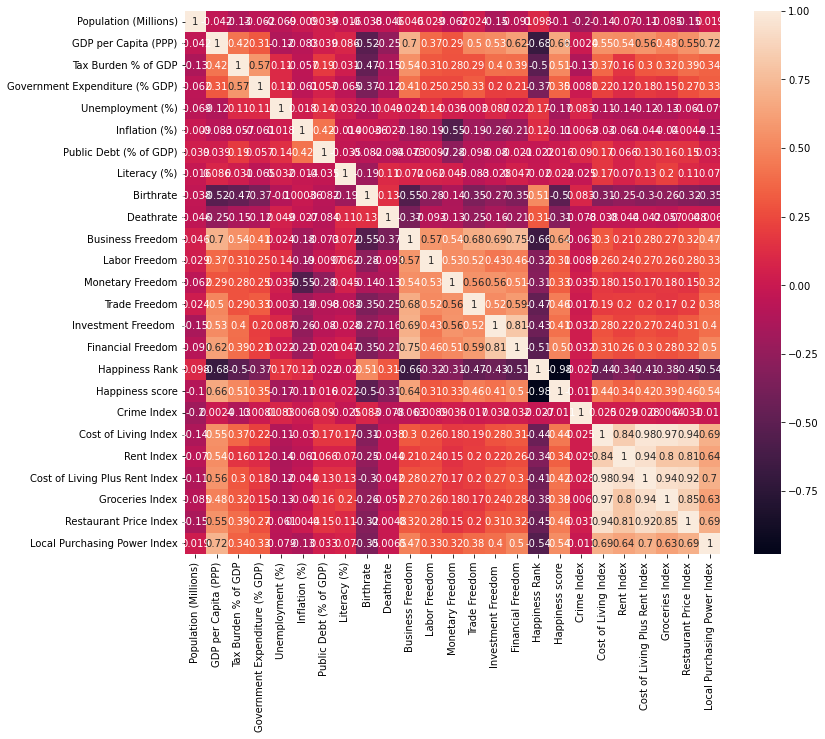

In [133]:
corr_matrix=data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

Esta matriz de correlación puede dar una idea general de las relaciones entre variables, pero no es lo suficientemente visual como para obtener información útil.

Matriz de correlación:
- Cerca de 1: relación directa (cuando aumenta X también lo hace Y)
- Cerca de -1: relación indirecta (cuando aumenta X disminuye Y)

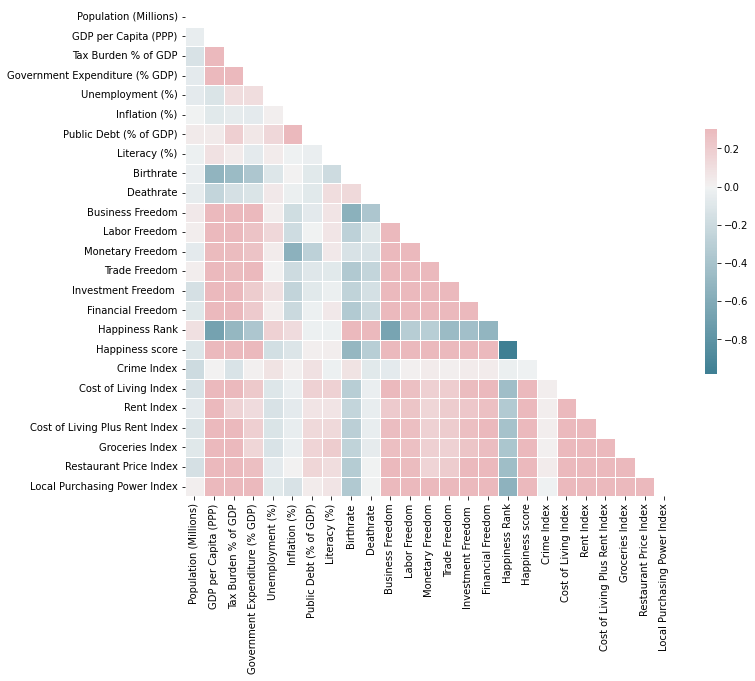

In [134]:
corr=data.corr()     
mask=np.triu(np.ones_like(corr, dtype=np.bool))     
f, ax=plt.subplots(figsize=(11, 9))
cmap=sns.diverging_palette(220, 10, as_cmap=True)   
sns.heatmap(corr, mask=mask, cmap=cmap,             
            vmax=.3, center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": .5});

Esta otra matriz de correlación es mucho más visual y permite sacar información útil relativa a las variables. Se puede observar que las variables *"Happiness Score"* y *"Happiness Rank"* tienen una relación directa alta. Esto se debe a que ambas dan prácticamente la misma información, pues clasifican a los diferentes países en función del índice de felicidad (*"Rank"* hace referencia a la posición del país en el ranking y *"Score"* es la puntuación de ese país). Por lo tanto, la variable *"Happiness Score"* es prescindible y puede eliminarse, ya que *"Happiness Rank"* es más lógica o fácil de interpretar.

Para poder observar mejor la relación entre la variable "Crime Index" y el resto de variables del dataset, **EXPLICAR!!!**

In [135]:
 data.select_dtypes(np.number).drop('Crime Index', axis=1).columns

Index(['Population (Millions)', 'GDP per Capita (PPP)', 'Tax Burden % of GDP',
       'Government Expenditure (% GDP)', 'Unemployment (%)', 'Inflation (%)',
       'Public Debt (% of GDP)', 'Literacy (%)', 'Birthrate', 'Deathrate',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom ', 'Financial Freedom',
       'Happiness Rank', 'Happiness score', 'Cost of Living Index',
       'Rent Index', 'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index'],
      dtype='object')

Explicación de las relaciones entre variables:
- **Positiva:** relación directa entre las variables (cuando X (*"una variable del dataset que no sea Crime Index"* aumenta, también lo hace Y (*"Crime Index"*)).
- **Negativa:** relación indirecta entre las variables (cuando X (*"una variable del dataset que no sea Crime Index"* aumenta, disminuye Y (*"Crime Index"*)).

##### 10. Limpieza de columnas prescindibles (aquellas que se ha comprobado que no afectan a la criminalidad) 

Tras analizar tanto las matrices de correlación como la regresión lineal, se puede observar que las diferentes variables del dataset tienen la siguente relación con *"Crime Index"*, ordenadas de mayor a menor:
- Cost of Living Plus Rent Index (-)
- Cost of Living Index (+)
- Rent Index (+) 
- Happiness Rank (-)
- Happiness score (-)
- Business Freedom (-)
- Tax Burden % of GDP (-)
- Monetary Freedom (+)
- Population (Millions) (-)
- Deathrate (-)
- Financial Freedom (+)
- Unemployment (%) (+)
- Government Expenditure (% GDP) (+)
- Public Debt (% of GDP) (+)
- Local Purchasing Power Index (-)
- GDP per capita (PPP) (+)
- Labor Freedom (+)
- Birthrate (+)
- Inflation (%) (+)
- Literacy (%) (-)
- Investment Freedom (-)
- Trade Freedom (-)

Por lo tanto, se procederá a eliminar aquellas columnas (variables) que no den mucha información adicional (o den información idéntica o muy parecida).

In [136]:
data = data.drop(['Happiness score', 'Public Debt (% of GDP)', 'Local Purchasing Power Index', 'GDP per Capita (PPP)', 'Labor Freedom', 'Birthrate', 'Inflation (%)', 'Literacy (%)', 'Investment Freedom ', 'Trade Freedom', 'Groceries Index', 'Restaurant Price Index'], axis =1)

In [137]:
data.head(3)

,Country Name,Continent,Population (Millions),Tax Burden % of GDP,Government Expenditure (% GDP),Unemployment (%),Deathrate,Business Freedom,Monetary Freedom,Financial Freedom,Happiness Rank,Crime Index,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index
0,Afghanistan,Asia,38.928341,7.47,32.611614,11.73,20.34,60.317614,74.391477,48.863636,146.0,36.00,20.37,2.72,12.09
1,Albania,Europe,2.837743,18.30,30.514667,11.70,5.22,70.700000,82.000000,70.000000,90.0,42.53,35.50,8.47,22.83
2,Algeria,Africa,43.851043,37.20,37.827000,12.83,4.61,50.000000,80.100000,30.000000,96.0,52.03,26.87,4.59,16.43


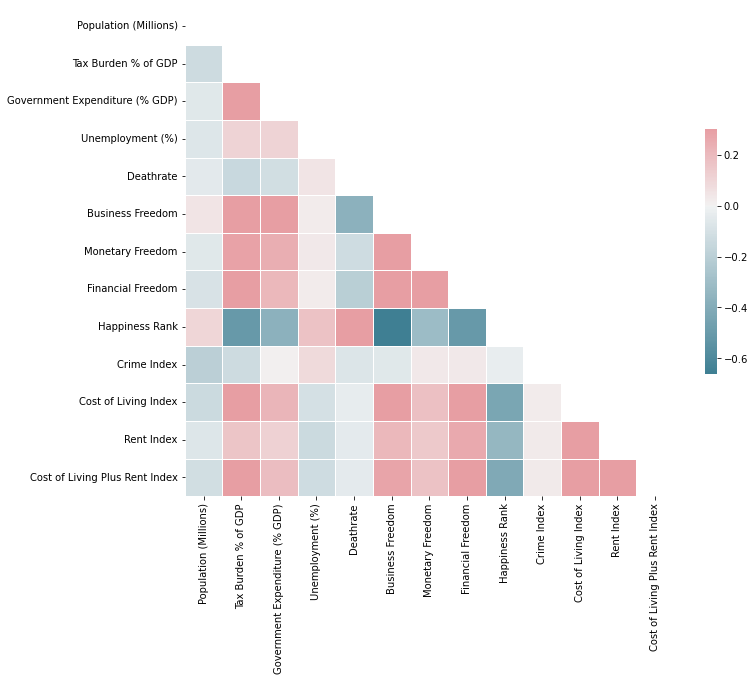

In [138]:
corr=data.corr()     
mask=np.triu(np.ones_like(corr, dtype=np.bool))     
f, ax=plt.subplots(figsize=(11, 9))
cmap=sns.diverging_palette(220, 10, as_cmap=True)   
sns.heatmap(corr, mask=mask, cmap=cmap,             
            vmax=.3, center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": .5});

En esta nueva matriz de correlación, en la cual ya se puede ver la relación que existe entre las diferentes varibales de manera más precisa, se observa que 

#########data.drop(['Business Freedom'], axis=1)

##### 8. Columnas Numéricas

In [139]:
num_cols=[c for c in data.columns if (data[c].dtype != 'object')]

In [140]:
num_cols

['Population (Millions)',
 'Tax Burden % of GDP',
 'Government Expenditure (% GDP)',
 'Unemployment (%)',
 'Deathrate',
 'Business Freedom',
 'Monetary Freedom',
 'Financial Freedom',
 'Happiness Rank',
 'Crime Index',
 'Cost of Living Index',
 'Rent Index',
 'Cost of Living Plus Rent Index']

##### 9. Columnas Categóricas

In [141]:
cat_cols = [col for col in data.columns if (data[col].dtype==object)]

In [142]:
cat_cols

['Country Name', 'Continent']

##### 10. Representación de columnas numéricas para identificar outliers

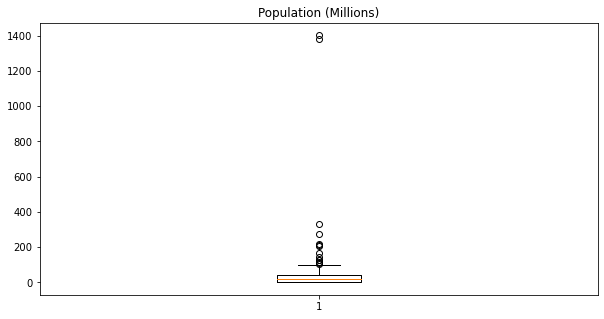

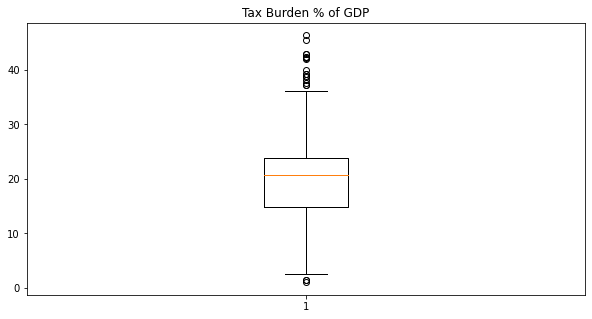

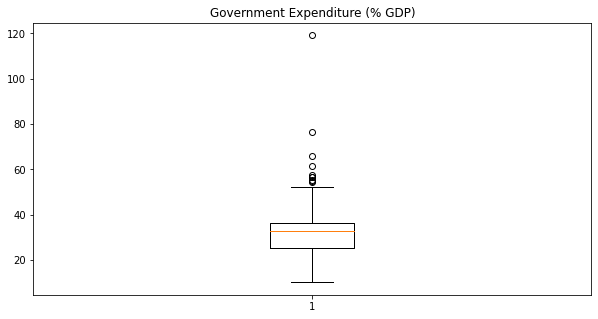

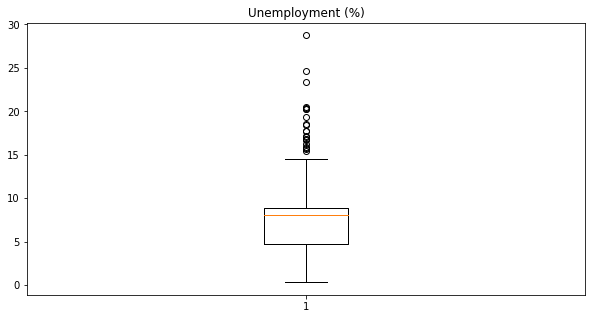

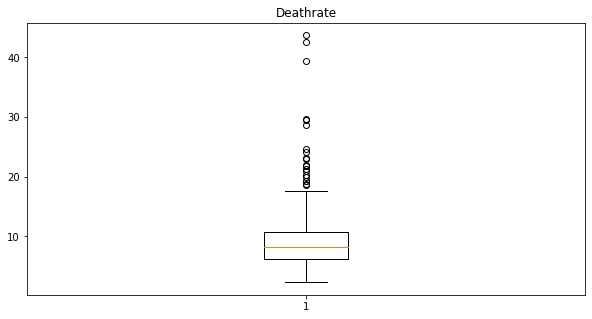

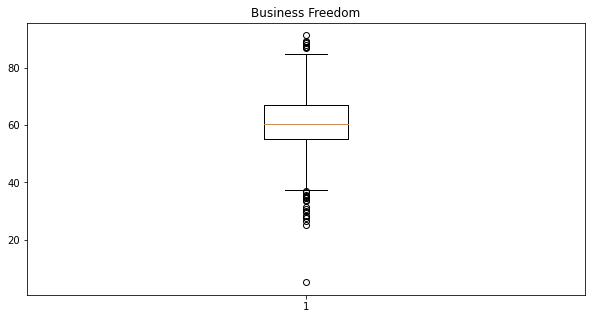

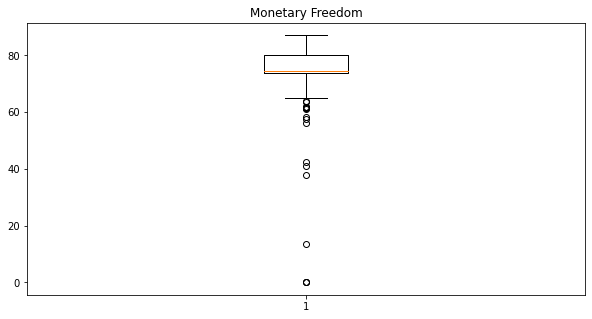

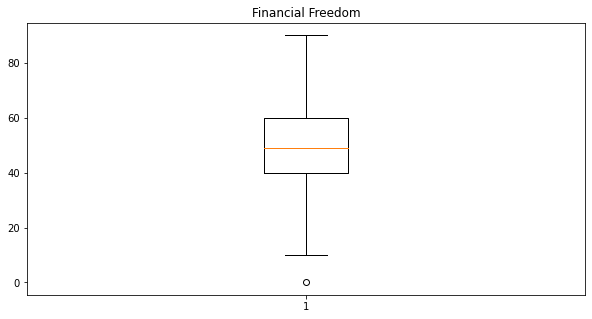

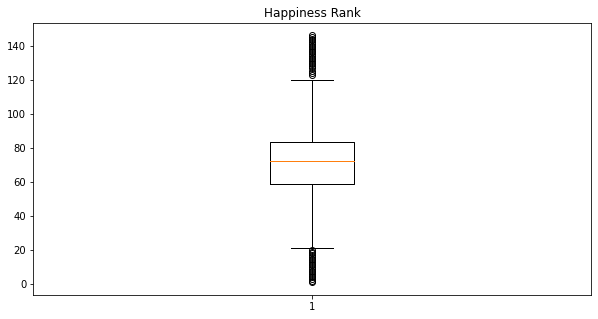

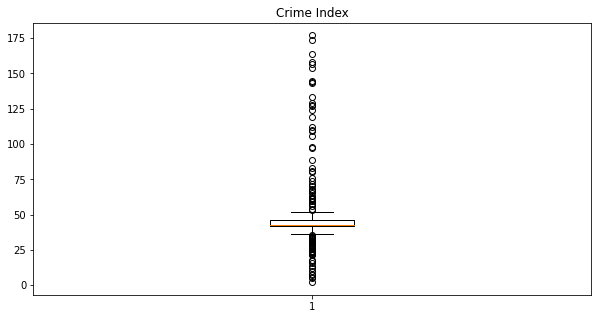

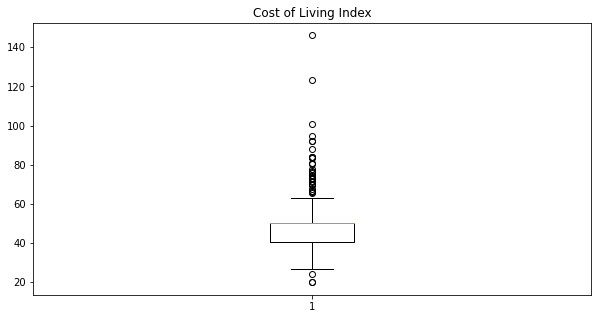

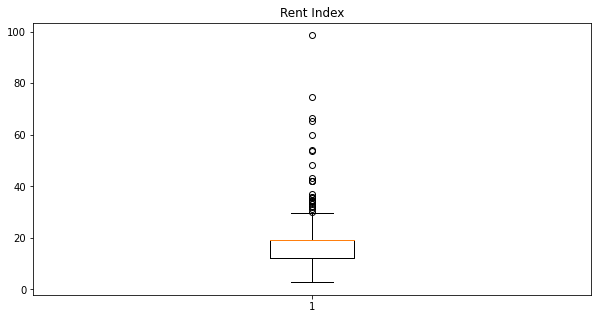

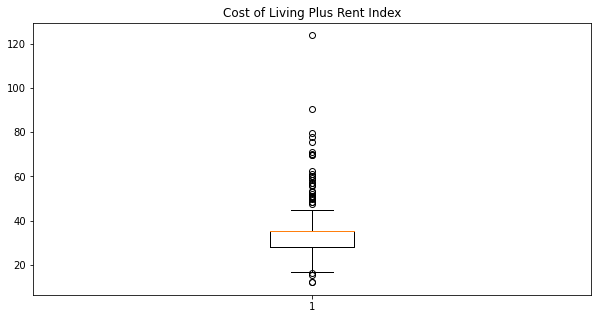

In [143]:
for c in num_cols:
    plt.figure(figsize=(10,5))
    plt.boxplot(data[c])
    plt.title(c)
    plt.show();

### Procesamiento de Datos

##### 11. Tratamiento de outliers

##### 12. Normalización

- Codificación de datos categóricos y posterior concatenación de variables numéricas y categóricas.

In [154]:
#####onehot encoding

In [ ]:
one_hot_data = pd.get_dummies(data[cat_cols], drop_first=True)

one_hot_data.head()

##### 13. Split (Train y Test)

In [ ]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

- Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = StandardScaler().fit_transform(X)

### Aplicación del Modelo

In [144]:
from sklearn.linear_model import LinearRegression

In [145]:
model = LinearRegression()

In [146]:
X = data.select_dtypes(np.number).drop('Crime Index', axis=1)
y = data['Crime Index']

In [147]:
from sklearn.preprocessing import StandardScaler

In [148]:
X = StandardScaler().fit_transform(X)

In [149]:
model.fit(X, y)

LinearRegression()

In [150]:
importance = model.coef_

In [151]:
[round(i, 2) for i in importance]

[-5.09,
 -8.67,
 3.68,
 3.83,
 -4.08,
 -8.0,
 2.3,
 4.27,
 -4.47,
 9614.84,
 6181.51,
 -15185.96]

In [152]:
import matplotlib.pyplot as plt

<BarContainer object of 12 artists>

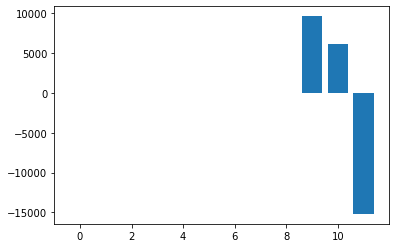

In [153]:
plt.bar([x for x in range(len(importance))], importance)

##### 14. Regresión Lineal

- Regularización (para mejorar el modelo)

##### 15. Random Forest (si no funcionara la regresión linear)

##### 16. KNN

##### 17. Clustering

In [32]:
import pandas as pd
df = pd.DataFrame({'a': [1, 2, 3, 4, 3, 1], 'b': [2, 8, 4, 6, 7, 8], 'c': ['Entidad', 'Entidad', 'Entidad', 'Entidad', 'Centroides', 'Centroides', ]})

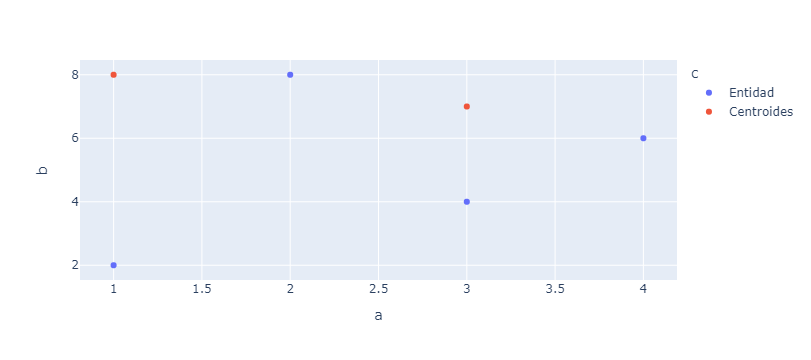

In [29]:
import plotly.express as px
px.scatter(df, x='a', y='b', color='c')

In [33]:
from sklearn.cluster import KMeans
KM = KMeans(2)
KM.fit(df.drop(columns = 'c'))

KMeans(n_clusters=2)

In [34]:
df['cluster'] = KM.predict(df.drop(columns = 'c'))

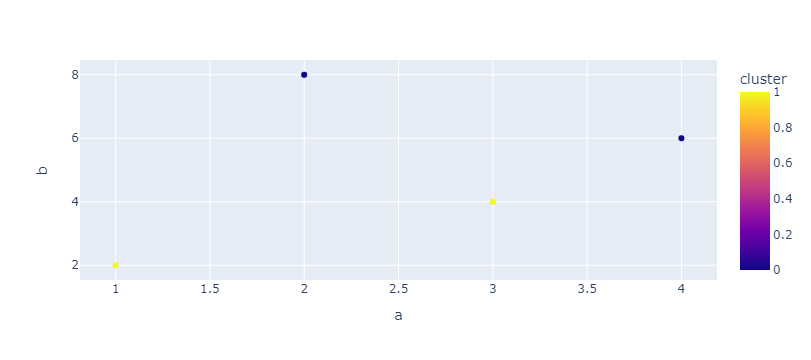

In [35]:
px.scatter(df[df['c']== 'Entidad'], x='a', y='b', color='cluster')

### Validación del Modelo

In [ ]:
models = [linreg, lasso, ridge, elastic, rfr, xgbr, lgbmr]
model_names = ['linreg', 'lasso', 'ridge', 'elastic', 'rfr', 'xgbr', 'lgbmr']
preds=[y_pred_linreg, y_pred_lasso, y_pred_ridge, y_pred_elastic, y_pred_rfr, y_pred_xgbr, y_pred_lgbmr]

In [ ]:
for i in range(len(models)):

    train_score = models[i].score(X_train, y_train) #R2
    test_score = models[i].score(X_test, y_test)

    print ('Model: {}, train R2: {} -- test R2: {}'.format(model_names[i], train_score, test_score))

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
for i in range(len(models)):
    train_mae=mae(models[i].predict(X_train), y_train) #MAE
    test_mae=mae(preds[i], y_test)

    print ('Model: {}, train MAE: {} -- test MAE: {}'.format(model_names[i], train_mae, test_mae))

### Conclusiones